In [ ]:
%pip install yfinance
%pip install pandas
%pip install image
%pip install matplotlib
%pip install numpy

## Imports usually done at the top

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the key finanical indicators for a given ticker

In [3]:
# Function to extract key financial indicators
def get_financial_indicators(ticker):
    """
    Extract key financial indicators for a given company ticker using Yahoo Finance API.
    
    Args:
    ticker (str): Stock ticker symbol of the company (e.g., 'AAPL' for Apple).
    
    Returns:
    dict: A dictionary containing key financial indicators.
    """
    try:
        # Fetch company data
        company = yf.Ticker(ticker)
        
        # Extracting key financial metrics
        financial_data = {
            'Company Name': company.info.get('shortName', 'N/A'),
            'Sector': company.info.get('sector', 'N/A'),
            'Industry': company.info.get('industry', 'N/A'),
            'Market Cap': company.info.get('marketCap', 'N/A'),
            'EPS (TTM)': company.info.get('trailingEps', 'N/A'),
            'P/E Ratio': company.info.get('trailingPE', 'N/A'),
            'PEG Ratio': company.info.get('pegRatio', 'N/A'),
            'Price-to-Book Ratio': company.info.get('priceToBook', 'N/A'),
            'Profit Margin': company.info.get('profitMargins', 'N/A'),
            'Dividend Yield': company.info.get('dividendYield', 'N/A'),
            '52-Week High': company.info.get('fiftyTwoWeekHigh', 'N/A'),
            '52-Week Low': company.info.get('fiftyTwoWeekLow', 'N/A'),
            'Beta': company.info.get('beta', 'N/A'),
        }
        
        return financial_data
    
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

## Display them

In [4]:
def display_financial_indicators(tickers):
    """
    Display financial indicators for a list of company tickers.
    
    Args:
    tickers (list): List of stock ticker symbols.
    
    Returns:
    pd.DataFrame: DataFrame containing financial indicators for the given tickers.
    """
    data = []
    
    for ticker in tickers:
        indicators = get_financial_indicators(ticker)
        if indicators:
            indicators['Ticker'] = ticker
            data.append(indicators)
    
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data)
    return df

## Very simple startegy that executes the most basic approach to algorithmic trading (buy low sell high)

[*********************100%***********************]  1 of 1 completed
C:\Users\brad8\AppData\Local\Temp\ipykernel_41492\2624674164.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock['Signal'][stock['Close'] > stock['50_MA']] = 1  # Bu

Columns in the DataFrame: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', '50_MA'], dtype='object', name='Price')
First few rows:
Price                      Adj Close      Close       High        Low  \
Date                                                                    
2020-01-02 00:00:00+00:00  72.795998  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088295  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662727  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.320976  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.484352  75.797501  76.110001  74.290001   
...                              ...        ...        ...        ...   
2020-04-14 00:00:00+00:00  69.737610  71.762497  72.062500  69.512497   
2020-04-15 00:00:00+00:00  69.101089  71.107498  71.582497  70.157501   
2020-04-16 00:00:00+00:00  69.650146  71.672501  72.050003  70.587502   
2020-04-17 00:00:00+00:00  68.705070  70.699997  71.7

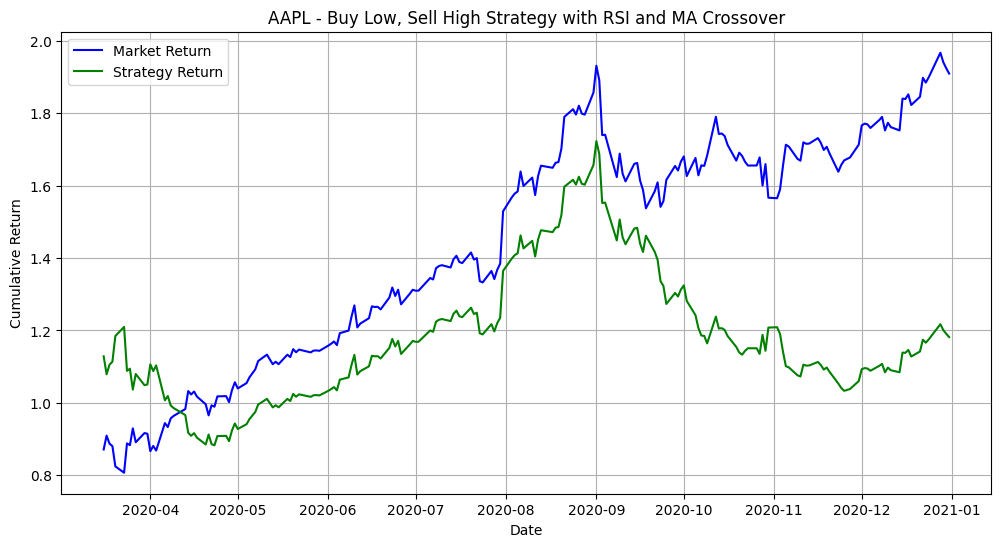

Price,Cumulative Return,Cumulative Strategy Return
Date,,
2020-12-24 00:00:00+00:00,1.899054,1.175300
2020-12-28 00:00:00+00:00,1.966975,1.217335
2020-12-29 00:00:00+00:00,1.940785,1.201127
2020-12-30 00:00:00+00:00,1.924236,1.190885
2020-12-31 00:00:00+00:00,1.909415,1.181712


In [5]:
def simple_buy_sell_strategy(ticker, start_date, end_date):
    """
    Implement a simple "Buy Low, Sell High" strategy using moving averages.
    
    Args:
    ticker (str): Stock ticker symbol (e.g., 'AAPL').
    start_date (str): Start date for stock data (e.g., '2020-01-01').
    end_date (str): End date for stock data (e.g., '2021-01-01').
    
    Returns:
    pd.DataFrame: Stock data with buy/sell signals and strategy performance.
    """
    # Fetch stock data
    stock = yf.download(ticker, start=start_date, end=end_date)
    
    # Flatten the multi-index columns (e.g., ('Close', 'AAPL') -> 'Close')
    stock.columns = stock.columns.get_level_values(0)
    
    # Calculate a 50-day moving average
    stock['50_MA'] = stock['Close'].rolling(window=50).mean()

    # Check the columns and print the first few rows
    print(f"Columns in the DataFrame: {stock.columns}")
    print(f"First few rows:\n{stock.head(75)}")
    
    # Check if the '50_MA' column was successfully created
    if '50_MA' not in stock.columns:
        print("Error: '50_MA' column was not created.")
        return None
    
    # Drop rows where '50_MA' is NaN (this will drop the first 49 rows)
    stock = stock.dropna(subset=['50_MA'])

    # Generate buy/sell signals based on price being above or below the moving average
    stock['Signal'] = 0
    stock['Signal'][stock['Close'] > stock['50_MA']] = 1  # Buy when price is above 50-day MA
    stock['Signal'][stock['Close'] < stock['50_MA']] = -1  # Sell when price is below 50-day MA
    
    # Shift signals to avoid look-ahead bias (i.e., using today's signal for tomorrow's price)
    stock['Signal'] = stock['Signal'].shift(1)
    
    # Calculate daily returns
    stock['Daily Return'] = stock['Close'].pct_change()
    
    # Calculate strategy returns by multiplying daily returns by the signal (1 or -1)
    stock['Strategy Return'] = stock['Daily Return'] * stock['Signal']
    
    # Calculate cumulative returns for both market and strategy
    stock['Cumulative Return'] = (1 + stock['Daily Return']).cumprod()
    stock['Cumulative Strategy Return'] = (1 + stock['Strategy Return']).cumprod()
    
    return stock


tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

# Define backtest period
start_date = '2020-01-01'
end_date = '2021-01-01'

# Run the strategy for a chosen stock
best_ticker = 'AAPL'  # Assuming 'AAPL' is the best stock for this example
stock_data = simple_buy_sell_strategy(best_ticker, start_date, end_date)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Cumulative Return'], label='Market Return', color='blue')
plt.plot(stock_data['Cumulative Strategy Return'], label='Strategy Return', color='green')
plt.title(f'{best_ticker} - Buy Low, Sell High Strategy with RSI and MA Crossover')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Display the strategy performance
stock_data[['Cumulative Return', 'Cumulative Strategy Return']].tail()